# Proyek Analisis Sentimen : Review Game Citampi Stories di Play Store (Modeling)
- **Nama:** Hafizha Aghnia Hasya
- **Email:** 	mc006d5x2114@student.devacademy.id
- **ID Dicoding:** MC006D5X2114

## Import Library

In [1]:
import numpy as np
import pandas as pd
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Loading Dataset

In [2]:
review = pd.read_csv('citampi_reviews.csv')

review.head()

,text_akhir,polarity
0,mantap bangett karya negara sendirismeangatt t...,positive
1,gameplay grafiknya udah memuaskan char cewekny...,negative
2,udah bagus reward pas tentuin jam malam jam pa...,positive
3,segi story gambarnya bagus quest membangun per...,positive
4,udah bagustapi karakter hilangwaktu citampi st...,negative


In [3]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59778 entries, 0 to 59777
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_akhir  59346 non-null  object
 1   polarity    59778 non-null  object
dtypes: object(2)
memory usage: 934.2+ KB


terdapat missing value pada text_akhir, kemungkinan ini karena review berisi simbol atau emoticon yang tidak terbaca, oleh karena itu menghasilkan null setelah preprocessing. 

perlu dilakukan drop pada data yang missing value

In [4]:
# drop missing value
review = review.dropna(subset=['text_akhir'])

In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59346 entries, 0 to 59768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_akhir  59346 non-null  object
 1   polarity    59346 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


**Data yang digunakan sebanyak 59.346**

## Data Splitting dan Ekstraksi Fitur

Pada project ini, akan ada 8 skema percobaan pelatihan seperti berikut
- Pelatihan: XGBoost,    Ekstraksi Fitur: Bag of Words,    Pembagian Data: 70/30
- Pelatihan: XGBoost,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20
- Pelatihan: Naive Bayes,    Ekstraksi Fitur: Bag of Words,    Pembagian Data: 70/30 
- Pelatihan: Naive Bayes,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20
- Pelatihan: Logistic Regression,    Ekstraksi Fitur: Bag of Words,    Pembagian Data: 70/30 
- Pelatihan: Logistic Regression,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20
- Pelatihan: SVM linear,    Ekstraksi Fitur: Bag of Words,    Pembagian Data: 70/30
- Pelatihan: SVM linear,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20

In [6]:
X = review['text_akhir']
y = review['polarity']

label_encoder = LabelEncoder()
# melakukan encoding pada label
y = label_encoder.fit_transform(y)

# membagi data menjadi 80% untuk training dan 20% untuk testing
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# membagi data menjadi 70% untuk training dan 30% untuk testing
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# ekstraksi fitur menggunakan TF-IDF
vectorizer_tfidf = TfidfVectorizer()

# TF-IDF untuk 80/20 split
X_train_80_tfidf = vectorizer_tfidf.fit_transform(X_train_80)
X_test_80_tfidf = vectorizer_tfidf.transform(X_test_80)

# ekstraksi fitur menggunakan BoW
vectorizer_bow = CountVectorizer()

# boW untuk 70/30 split
X_train_70_bow = vectorizer_bow.fit_transform(X_train_70)
X_test_70_bow = vectorizer_bow.transform(X_test_70)


print("\nTF-IDF - 80/20 Split")
print("Training Data Shape:", X_train_80_tfidf.shape)
print("Testing Data Shape:", X_test_80_tfidf.shape)

print("\nBag of Words (BoW) - 70/30 Split")
print("Training Data Shape:", X_train_70_bow.shape)
print("Testing Data Shape:", X_test_70_bow.shape)


TF-IDF - 80/20 Split
Training Data Shape: (47476, 41118)
Testing Data Shape: (11870, 41118)

Bag of Words (BoW) - 70/30 Split
Training Data Shape: (41542, 37499)
Testing Data Shape: (17804, 37499)


## Modeling

In [7]:
# ===================== XGBoost - Bag of Words =====================
xgb_model_bow = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model_bow.fit(X_train_70_bow, y_train_70)

xgb_train_pred_bow = xgb_model_bow.predict(X_train_70_bow)
xgb_test_pred_bow = xgb_model_bow.predict(X_test_70_bow)

xgb_bow_acc_train = accuracy_score(y_train_70, xgb_train_pred_bow)
xgb_bow_acc_test = accuracy_score(y_test_70, xgb_test_pred_bow)
print("XGBoost Train Accuracy (BoW):", xgb_bow_acc_train)
print("XGBoost Test Accuracy (BoW):", xgb_bow_acc_test)
print("======"*10)


# ===================== XGBoost - TF-IDF =====================
xgb_model_tfidf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model_tfidf.fit(X_train_80_tfidf, y_train_80)

xgb_train_pred_tfidf = xgb_model_tfidf.predict(X_train_80_tfidf)
xgb_test_pred_tfidf = xgb_model_tfidf.predict(X_test_80_tfidf)

xgb_tfidf_acc_train = accuracy_score(y_train_80, xgb_train_pred_tfidf)
xgb_tfidf_acc_test = accuracy_score(y_test_80, xgb_test_pred_tfidf)
print("XGBoost Train Accuracy (TF-IDF):", xgb_tfidf_acc_train)
print("XGBoost Test Accuracy (TF-IDF):", xgb_tfidf_acc_test)

XGBoost Train Accuracy (BoW): 0.8285590486736315
XGBoost Test Accuracy (BoW): 0.7762300606605257
XGBoost Train Accuracy (TF-IDF): 0.8503875642429859
XGBoost Test Accuracy (TF-IDF): 0.7781802864363943


In [8]:
# ===================== Naive Bayes - Bag of Words =====================
nb_model_bow = MultinomialNB()
nb_model_bow.fit(X_train_70_bow, y_train_70)

nb_train_pred_bow = nb_model_bow.predict(X_train_70_bow)  # Prediksi training
nb_test_pred_bow = nb_model_bow.predict(X_test_70_bow)

nb_bow_acc_train = accuracy_score(y_train_70, nb_train_pred_bow)
nb_bow_acc_test = accuracy_score(y_test_70, nb_test_pred_bow)
print("Naive Bayes Train Accuracy (BoW):", nb_bow_acc_train)
print("Naive Bayes Test Accuracy (BoW):", nb_bow_acc_test)
print("======"*10)

# ===================== Naive Bayes - TF-IDF =====================
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_80_tfidf, y_train_80)

nb_train_pred_tfidf = nb_model_tfidf.predict(X_train_80_tfidf)
nb_test_pred_tfidf = nb_model_tfidf.predict(X_test_80_tfidf)

nb_tfidf_acc_train = accuracy_score(y_train_80, nb_train_pred_tfidf)
nb_tfidf_acc_test = accuracy_score(y_test_80, nb_test_pred_tfidf)
print("Naive Bayes Train Accuracy (TF-IDF):", nb_tfidf_acc_train)
print("Naive Bayes Test Accuracy (TF-IDF):", nb_tfidf_acc_test)

Naive Bayes Train Accuracy (BoW): 0.8243705165856242
Naive Bayes Test Accuracy (BoW): 0.6992248932824084
Naive Bayes Train Accuracy (TF-IDF): 0.7633541157637543
Naive Bayes Test Accuracy (TF-IDF): 0.6698399326032013


In [9]:
# ===================== Logistic Regression - Bag of Words =====================
logreg_model_bow = LogisticRegression(max_iter=1000)
logreg_model_bow.fit(X_train_70_bow, y_train_70)

logreg_train_pred_bow = logreg_model_bow.predict(X_train_70_bow)
logreg_test_pred_bow = logreg_model_bow.predict(X_test_70_bow)

logreg_bow_acc_train = accuracy_score(y_train_70, logreg_train_pred_bow)
logreg_bow_acc_test = accuracy_score(y_test_70, logreg_test_pred_bow)
print("Logistic Regression Train Accuracy (BoW):", logreg_bow_acc_train)
print("Logistic Regression Test Accuracy (BoW):", logreg_bow_acc_test)
print("======"*10)

# ===================== Logistic Regression - TF-IDF =====================
logreg_model_tfidf = LogisticRegression(max_iter=1000)
logreg_model_tfidf.fit(X_train_80_tfidf, y_train_80)

logreg_train_pred_tfidf = logreg_model_tfidf.predict(X_train_80_tfidf)
logreg_test_pred_tfidf = logreg_model_tfidf.predict(X_test_80_tfidf)

logreg_tfidf_acc_train = accuracy_score(y_train_80, logreg_train_pred_tfidf)
logreg_tfidf_acc_test = accuracy_score(y_test_80, logreg_test_pred_tfidf)
print("Logistic Regression Train Accuracy (TF-IDF):", logreg_tfidf_acc_train)
print("Logistic Regression Test Accuracy (TF-IDF):", logreg_tfidf_acc_test)

Logistic Regression Train Accuracy (BoW): 0.9757354003177507
Logistic Regression Test Accuracy (BoW): 0.8842956638957538
Logistic Regression Train Accuracy (TF-IDF): 0.8876484960822311
Logistic Regression Test Accuracy (TF-IDF): 0.8256107834877844


In [10]:
# ===================== SVM Linear - Bag of Words =====================
svm_model_bow = SVC(kernel='linear')
svm_model_bow.fit(X_train_70_bow, y_train_70)

svm_train_pred_bow = svm_model_bow.predict(X_train_70_bow)
svm_test_pred_bow = svm_model_bow.predict(X_test_70_bow)

svm_bow_acc_train = accuracy_score(y_train_70, svm_train_pred_bow)
svm_bow_acc_test = accuracy_score(y_test_70, svm_test_pred_bow)
print("SVM Train Accuracy (BoW):", svm_bow_acc_train)
print("SVM Test Accuracy (BoW):", svm_bow_acc_test)
print("======"*10)

# ===================== SVM Linear - TF-IDF =====================
svm_model_tfidf = SVC(kernel='linear')
svm_model_tfidf.fit(X_train_80_tfidf, y_train_80)

svm_train_pred_tfidf = svm_model_tfidf.predict(X_train_80_tfidf)
svm_test_pred_tfidf = svm_model_tfidf.predict(X_test_80_tfidf)

svm_tfidf_acc_train = accuracy_score(y_train_80, svm_train_pred_tfidf)
svm_tfidf_acc_test = accuracy_score(y_test_80, svm_test_pred_tfidf)
print("SVM Train Accuracy (TF-IDF):", svm_tfidf_acc_train)
print("SVM Test Accuracy (TF-IDF):", svm_tfidf_acc_test)

SVM Train Accuracy (BoW): 0.9894323816860046
SVM Test Accuracy (BoW): 0.9050775106717591
SVM Train Accuracy (TF-IDF): 0.9282163619513017
SVM Test Accuracy (TF-IDF): 0.8486941870261162


## Inference / Testing

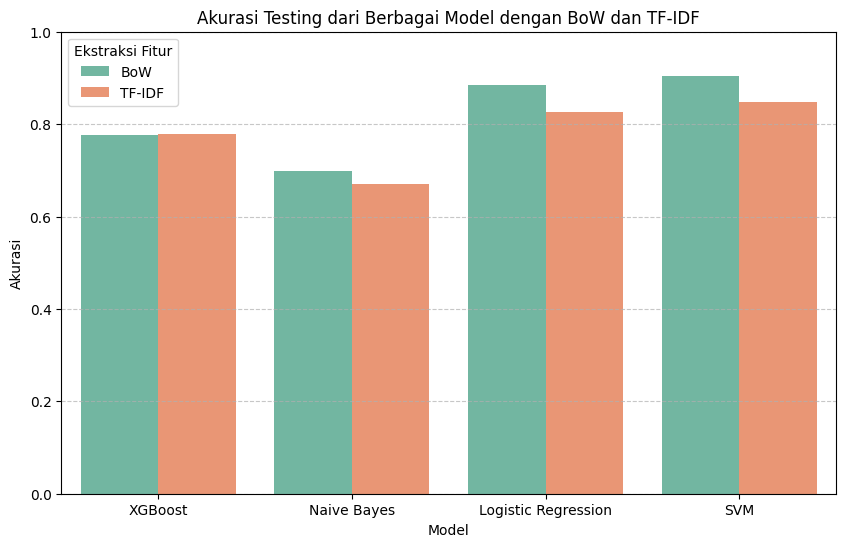

In [11]:
# data akurasi dari setiap model
models = ['XGBoost', 'Naive Bayes', 'Logistic Regression', 'SVM']
accuracy_bow = [xgb_bow_acc_test, nb_bow_acc_test, logreg_bow_acc_test, svm_bow_acc_test]
accuracy_tfidf = [xgb_tfidf_acc_test, nb_tfidf_acc_test, logreg_tfidf_acc_test, svm_tfidf_acc_test]

# membuat DataFrame untuk visualisasi
df = pd.DataFrame({
    'Model': models * 2,
    'Akurasi': accuracy_bow + accuracy_tfidf,
    'Ekstraksi Fitur': ['BoW'] * 4 + ['TF-IDF'] * 4
})

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Model', y='Akurasi', hue='Ekstraksi Fitur', palette='Set2')

plt.title("Akurasi Testing dari Berbagai Model dengan BoW dan TF-IDF")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(title="Ekstraksi Fitur")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight**
- **Akurasi testing tertinggi adalah 90.5%** pada model SVM Bag of Words
- Akurasi tertinggi berikutnya adalah **88.4%** (Logistic Regression Bag of Words) dan **84.8%** (SVM TF-IDF)
- Untuk model Naive Bayes, Logistic Regression, dan SVM terdapat overfitting di mana akurasi training lebih tinggi daripada testing. Ini dapat dicegah dengan melakukan cross-validation
- Model Naive Bayes memiliki akurasi yang paling rendah, mungkin masih bisa ditingkatkan dengan hyperparameter tuning
- Akurasi model pada project ini kemungkinan bisa ditingkatkan lagi menggunakan model ensemble seperti voting (saya sudah mencoba nya namun memakan waktu komputasi yang terlalu lama) atau bisa juga menggunakan deep learning (juga memakan waktu komputasi yang terlalu lama walaupun sudah menggunakan gpu, kemungkinan karena banyaknya fitur)

In [14]:
# Contoh review baru yang ingin diuji
new_reviews = ["game bagus dan keren, saya suka", 
               "bagus tapi perlu ditingkatkan lagi",
               "buruk sekali, jelek, saya kecewa"]

# Transformasikan review ke dalam bentuk fitur (BoW)
new_reviews_bow = vectorizer_bow.transform(new_reviews)

# Prediksi menggunakan model SVM yang sudah dilatih
predictions = svm_model_bow.predict(new_reviews_bow)

sentiment_labels = label_encoder.inverse_transform(predictions)

for review, sentiment in zip(new_reviews, sentiment_labels):
    print(f"Review: \"{review}\" -> Sentimen: {sentiment}")

Review: "game bagus dan keren, saya suka" -> Sentimen: positive
Review: "bagus tapi perlu ditingkatkan lagi" -> Sentimen: neutral
Review: "buruk sekali, jelek, saya kecewa" -> Sentimen: negative
